In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib
import matplotlib.pyplot as plt



In [4]:

atac_chrombpnet_uncorrected1="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/K562/footprints/K562_uncorrected_footprints.h5"
dnase_chrombpnet_uncorrected1="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/footprints/K562_uncorrected_footprints.h5"


In [5]:
import deepdish
import numpy as np

In [6]:
def normalize_marginal_footprints(input_f):
    for key in input_f:
        if key=="control":
            continue
        
        input_f[key][0]  = input_f[key][0]  / np.sum(input_f[key][0])
        #input_f[key][0] = input_f[key][0] * (np.log(input_f[key][1]/input_f["control"][1]))
        #input_f[key][0] = input_f[key][0]

        #print(input_f[key][1], input_f["control"][1])
    return input_f

In [7]:
#uncorrected = normalize_marginal_footprints(deepdish.io.load(chrombpnet_uncorrected1))
atac_uncorrected = normalize_marginal_footprints(deepdish.io.load(atac_chrombpnet_uncorrected1))
dnase_uncorrected = normalize_marginal_footprints(deepdish.io.load(dnase_chrombpnet_uncorrected1))

#atac_uncorrected = deepdish.io.load(atac_chrombpnet_uncorrected1)
#dnase_uncorrected = deepdish.io.load(dnase_chrombpnet_uncorrected1)


In [8]:
#atac_uncorrected.keys()

['K562_COUNTS_metacluster_0_pattern_0', 'K562_COUNTS_metacluster_0_pattern_1', 'K562_COUNTS_metacluster_0_pattern_2', 'K562_COUNTS_metacluster_0_pattern_3', 'K562_COUNTS_metacluster_0_pattern_4', 'K562_COUNTS_metacluster_0_pattern_5', 'K562_COUNTS_metacluster_0_pattern_6', 'K562_COUNTS_metacluster_0_pattern_7', 'K562_COUNTS_metacluster_0_pattern_8', 'K562_COUNTS_metacluster_0_pattern_10', 'GM12878_COUNTS_metacluster_0_pattern_4']


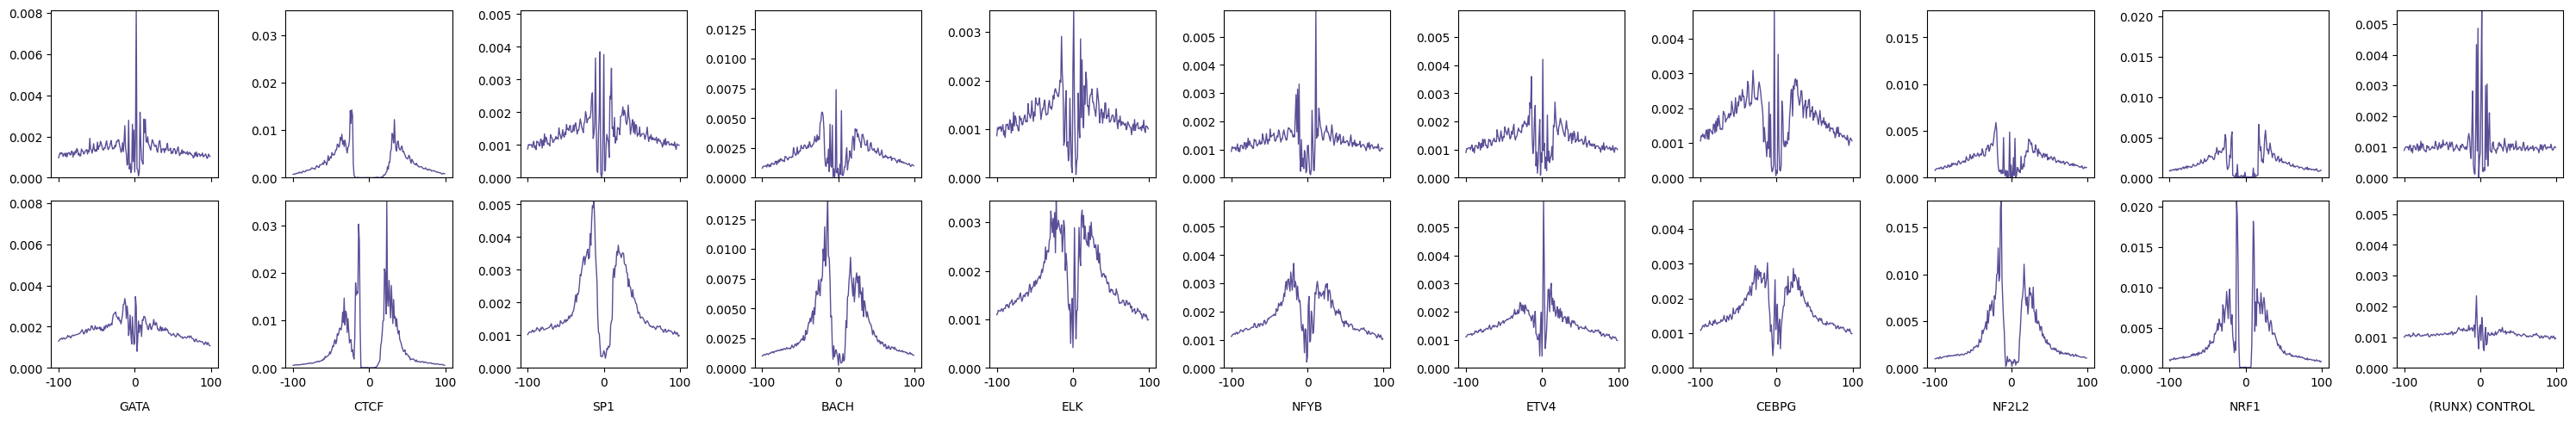

In [21]:
fig,axs = plt.subplots(2,11,figsize=(30,5),sharex=True,sharey=False)
plt.style.use('default')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

keyd="GM12878_COUNTS_metacluster_0_pattern_"

motifs_n = ["K562_COUNTS_metacluster_0_pattern_"+str(i) for i in range(11) if i != 9]
motifs_n += ["GM12878_COUNTS_metacluster_0_pattern_4"]
print(motifs_n)
for i in range(0,11):
    axs[0,i].plot(atac_uncorrected[motifs_n[i]][0][400:600], alpha=0.9, label="uncorrected", c="#473C8B",linewidth=1)
    axs[1,i].plot(dnase_uncorrected[motifs_n[i]][0][400:600], alpha=0.9, label="uncorrected", c="#473C8B",linewidth=1)
    axs[0,i].set_ylim((0, np.max([dnase_uncorrected[motifs_n[i]][0][400:600],atac_uncorrected[motifs_n[i]][0][400:600]])))
    axs[1,i].set_ylim((0, np.max([dnase_uncorrected[motifs_n[i]][0][400:600],atac_uncorrected[motifs_n[i]][0][400:600]])))
    plt.locator_params(axis='x', nbins=3)

motifs = [key.replace("K562_COUNTS_metacluster_0_","")for key in motifs_n]

motifs= ["GATA", "CTCF", "SP1", "BACH", "ELK", "NFYB", "ETV4", "CEBPG", "NF2L2", "NRF1", " (RUNX) CONTROL"]
for ax, row in zip(axs[-1], motifs):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=10)
    ax.set_xticks([0,100,200])
    ax.set_xticklabels(["-100","0","100"])
fig.tight_layout()

plt.savefig("subfigs/performance_plots/motif_response_plots.pdf", transparent=True, dpi=300)
